In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [209]:
df = pd.read_csv('youtube_channel_real_performance_analytics.csv')


In [210]:
print(df.head())

   ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  \
0   0           201.0  2016-06-02 00:00:00                   0    2      6   
1   1           391.0  2016-06-10 00:00:00                   8   10      6   
2   2           133.0  2016-06-14 00:00:00                   4   14      6   
3   3            14.0  2016-06-29 00:00:00                  15   29      6   
4   4            45.0  2016-07-01 00:00:00                   2    1      7   

   Year Day of Week  Revenue per 1000 Views (USD)  \
0  2016    Thursday                         0.024   
1  2016      Friday                         0.056   
2  2016     Tuesday                         0.014   
3  2016   Wednesday                         0.004   
4  2016      Friday                         0.000   

   Monetized Playbacks (Estimate)  ...  Watched (Not Skipped) (%)  \
0                           723.0  ...                        0.0   
1                           727.0  ...                        0.0   
2    

In [211]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [212]:
 print(df.isnull().sum())

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64


In [213]:
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

In [214]:
le = LabelEncoder()
df['Day of Week'] = le.fit_transform(df['Day of Week'])

In [215]:
# Feature Engineering
## Revenue per View
df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views'].replace(0, np.nan)

## Engagement Rate (%)
df['Engagement Rate (%)'] = ((df['Likes'] + df['Shares'] + df['New Comments']) / df['Views'].replace(0, np.nan)) * 100

## Log Transform Revenue
df['Log Revenue'] = np.log1p(df['Estimated Revenue (USD)'])


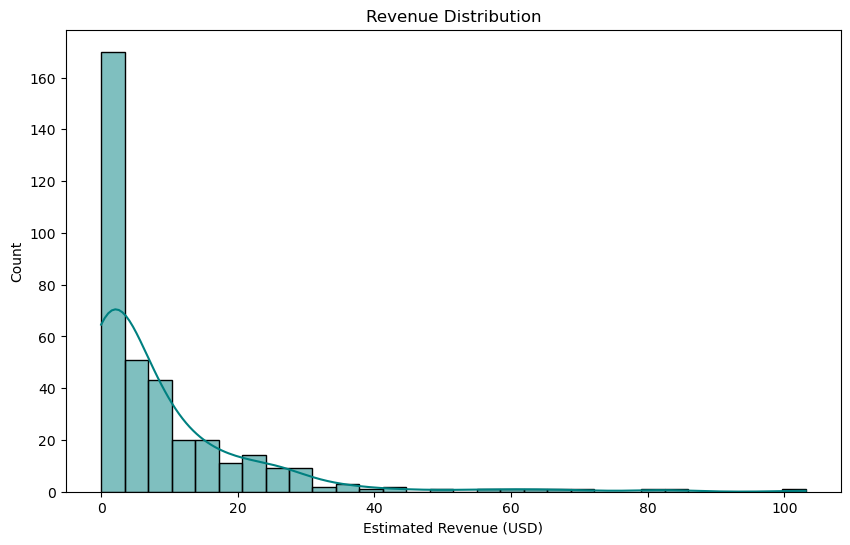

In [216]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Revenue (USD)'], bins=30, kde=True, color='teal')
plt.title('Revenue Distribution')
plt.show()

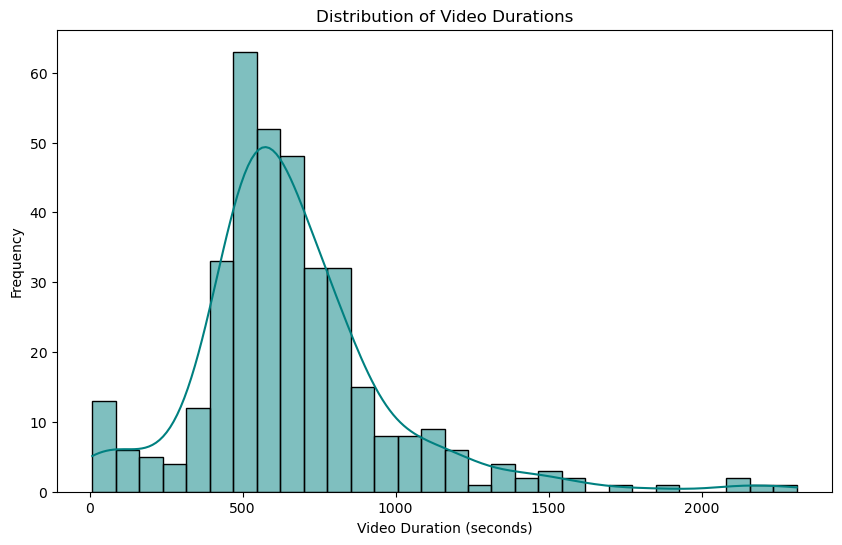

In [217]:
 # Distribution of video durations
 plt.figure(figsize=(10, 6))
 sns.histplot(df['Video Duration'], bins=30, kde=True, color = 'teal')
 plt.title('Distribution of Video Durations')
 plt.xlabel('Video Duration (seconds)')
 plt.ylabel('Frequency')
 plt.show()

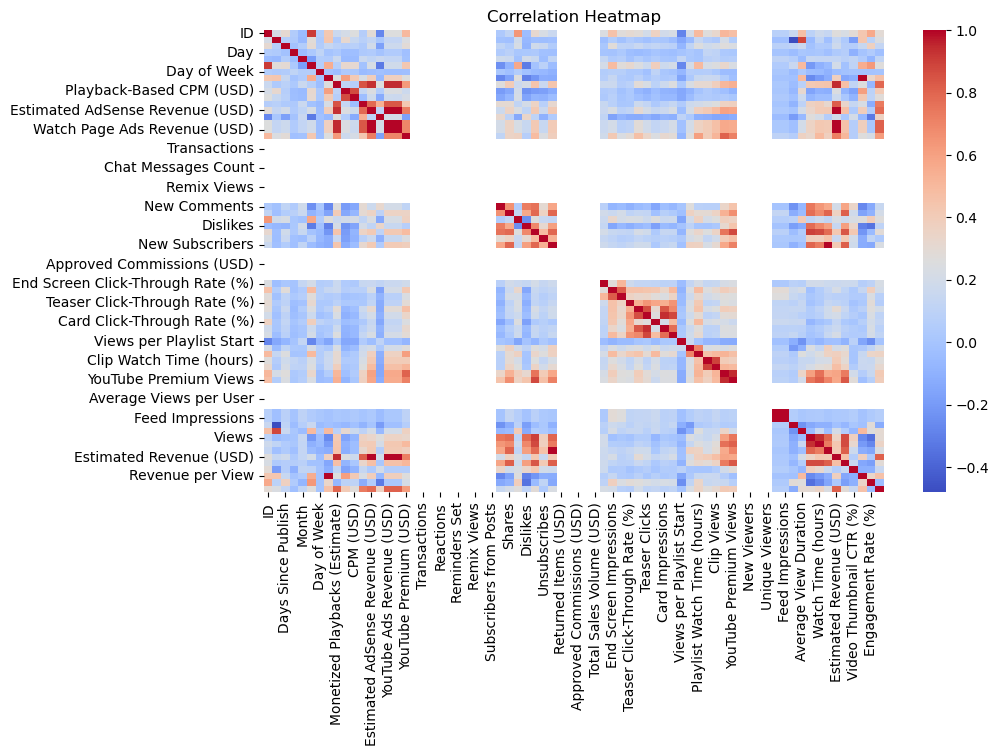

In [218]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [219]:
# Prepare Data for Modeling
feature_cols = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate (%)', 'Revenue per View', 'Day of Week', 'Video Duration']
X = df[feature_cols].fillna(0)
y = df['Log Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [220]:
# Model Training with Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [221]:
# Model Evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Model Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R2 Score: {r2:.4f}')

Best Model Parameters: {'max_depth': None, 'n_estimators': 200}
Mean Squared Error: 0.0411
R2 Score: 0.9700


In [222]:
# Feature Importance

importances = best_model.feature_importances_
feat_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': importances}).sort_values(by='Importance', ascending=False)


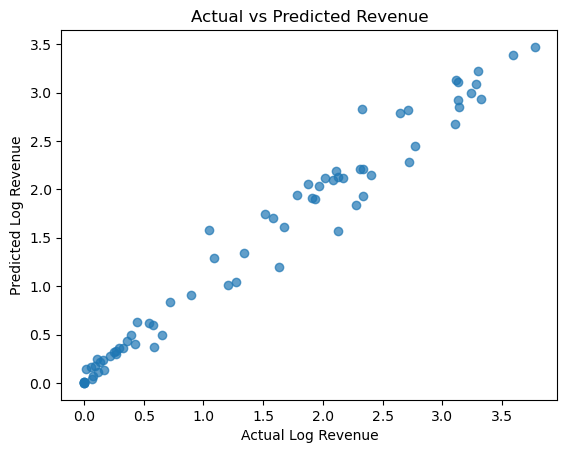

In [223]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Log Revenue')
plt.ylabel('Predicted Log Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()


In [224]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print('Cross-Validation R2 Scores:', cv_scores)
print('Average CV R2:', np.mean(cv_scores))

Cross-Validation R2 Scores: [0.69451047 0.91442931 0.96238737 0.93948684 0.91287163]
Average CV R2: 0.8847371220023257


In [225]:
 X = numeric_df.drop(columns=['Estimated Revenue (USD)'])
 y = numeric_df['Estimated Revenue (USD)']

In [226]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [227]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100,
random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [228]:
# Make predictions
y_pred = model.predict(X_test)

In [229]:
# Calculate the prediction accuracy
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.4828740106603764